# Hypothesis 3
### Mentions of economically-salient words will be more common in reviews during economic hardship.
##### When money is scant, larger (or smaller) portion sizes for the price will be greater (and less) appreciated.

We're going to plot the numbers of reviews per date from a specific location in the Yelp dataset that contain 'economically-salient' words, and from this we will again try to visualize economic change. Again, the frequencies will need to be normalized to account for the ever-growing numbers of Yelpers over time.

What is an 'economically-salient' word? These are words (or regular expressions) that obviously display how a reviewer views a business in an economic sense. Under this logic, we can determine the wealth of a reviewer solely given the number of mentions they provide regarding price at various businesses. We can assume therefore that during times of economic crisis where money is harder to come by, economic terms will appear more often in reviews.

The regular expressions we are user here to represent unhappiness given the economy are the following:
* small portion(s | sizes)
* portion(s | sizes) are not (too/very/that) large/big/huge/great/generous/massive
* portion(s | sizes) are (very/quite/too) small/measly/bad
* not (very/too/that) cheap/inexpensive
* expensive/pricey
    

And inversely, the regular expressions we are user here to represent happiness given the economy are the following:
* portion(s | sizes) are (very/quite/too) large/big/huge/great/generous/massive
* portion(s | sizes) are not (too/very/that) small/measly/bad
* cheap/inexpensive
* not (very/too/that) expensive/pricey

Let's convert all these to python regexes...

In [11]:
regexes = r"((portion(s| sizes?)|food)? .* (large|big|huge|great|generous|massive|small|measly|bad)) |\
    ((cheap|expensive|pricy|generous|good|big|tiny|small|bad|food) .* (price|deal|portion|serving))"  

In [12]:
import pandas as pd
import numpy as np
import collections
import pickle, os
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
from datetime import datetime

In [13]:
# change this path to your own.
path = "E:/yelp/"

We're going to steal swaths of code from 'Hypothesis 1' and put it here to be used.

In [14]:
def plot_city_stats(times, other_axis, redo_x=False, redo_y=False):
    """
    This allows you to plot our dates and normalized counts with a particular x and y axis.
    
    Args:
        times ([datetime.datetime]): the datetimes where reviews are present for a given location
        other_axis ([float]): the review_counts for the datetimes normalized by number of new users on that date
        redo_x ([datetime], optional): two datetimes representing the start and end dates to view on the graph; defaults to False.
        redo_y ([float], optional): two floats representing the upper and lower bounds of the normalized reviews to be viewed on the graph; defaults to False.
    
    """
    
    plottable_dates = date2num([datetime.strptime(i, '%Y-%m-%d') for i in times])
    
    plt.figure(figsize=(20,10))
    plt.plot_date(plottable_dates, other_axis)
    
    if redo_x:
        plt.xlim(redo_x[0], redo_x[1])
    
    if redo_y:
        plt.ylim(redo_y[0], redo_y[1])
    
    #plt.title("{} for {}".format(stats, city))
    #plt.plot(times, np.poly1d(np.polyfit(times, other_axis, 1)))
    plt.show()

A different normalizeLocation function will be necessary for this task, as we are not measuring the same things as we did in Hypothesis 1.

In [15]:
def normalizeLocation(state, path, cities_or_states="States"):
    """
    Given a state (or city if you really want to go that route), find the dates of the reviews and the normalized counts per date.
    
    Args:
        state (str): represents the state code or city_state combo
        path (str): the location where all the files for this project can be found
        cities_or_states (str, optional): either "States" or "Cities" and reflects which directory data is being found in
        
    Returns:
        [datetime.datetime]: the dates where reviews for a given location are taken from
        [float]: review counts normalized given new user counts for each date in the datetime
    
    """
    
    reviews = pd.read_pickle(os.path.join(path, cities_or_states, "{}.pkl".format(state)))
    
    review_dates = reviews.sort_values('date')['date'].unique().tolist()  # first part to return
    overall_sorted_reviews = reviews.sort_values('date').groupby(['date'], as_index=False).count()
    overall_review_counts = overall_sorted_reviews['review_id'].tolist()
    
    dates_and_regexes = reviews.filter(['date']).join(reviews['text'].str.contains(regexes, case=False))
    sorted_dates_and_regexes = dates_and_regexes.groupby(['date'], as_index=False).sum()
    
    review_counts = sorted_dates_and_regexes['text'].tolist()

    normalized_review_counts = [r / u for r,u in zip(review_counts, overall_review_counts)]  # second part to return
    
    return review_dates, normalized_review_counts

In [6]:
# warning: This takes a long, LONG time to run. (I'm talking like ten minutes.) Just be prepared for it...
ON_dates, ON_counts = normalizeLocation("ON", path)

C:\Users\jayka\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


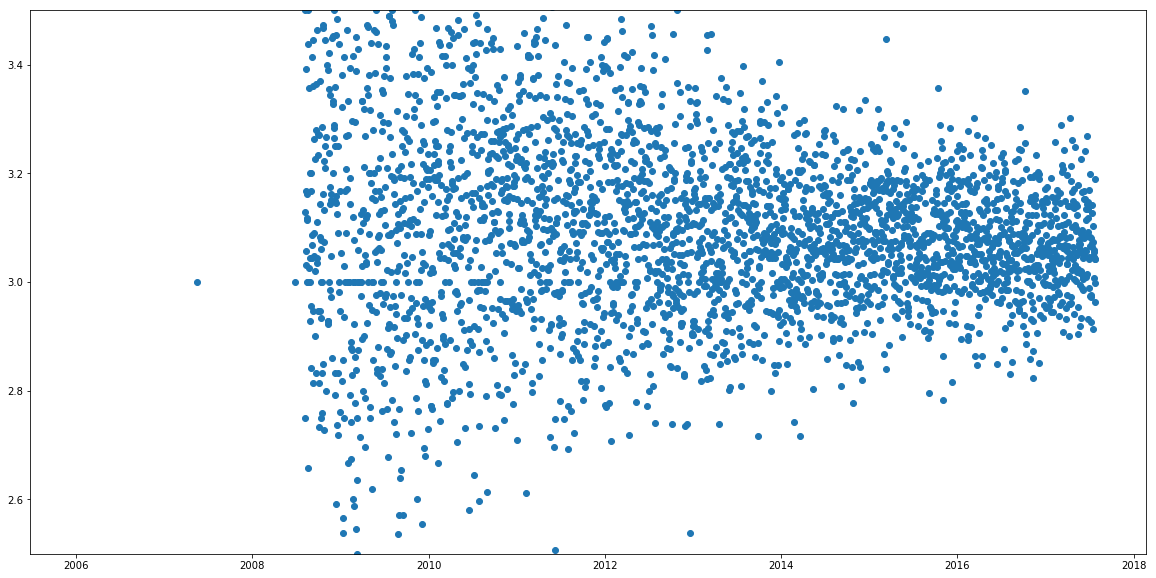

In [7]:
plot_city_stats(ON_dates, ON_counts,
               #redo_x=([datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)]),
               redo_y=(2.5, 3.5)
               )

In [8]:
NV_dates, NV_counts = normalizeLocation("NV", path)

C:\Users\jayka\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


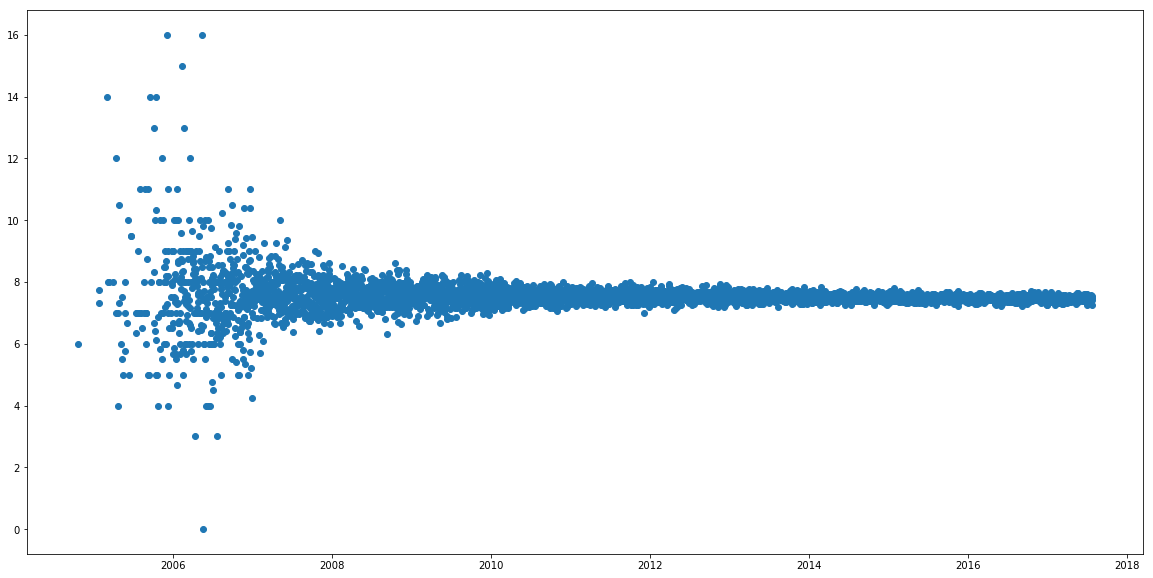

In [9]:
plot_city_stats(NV_dates, NV_counts,
               #redo_x=([datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)]),
               #redo_y=(2.5, 3.5)
               )

In [16]:
EDH_dates, EDH_counts = normalizeLocation("EDH", path)

C:\Users\jayka\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


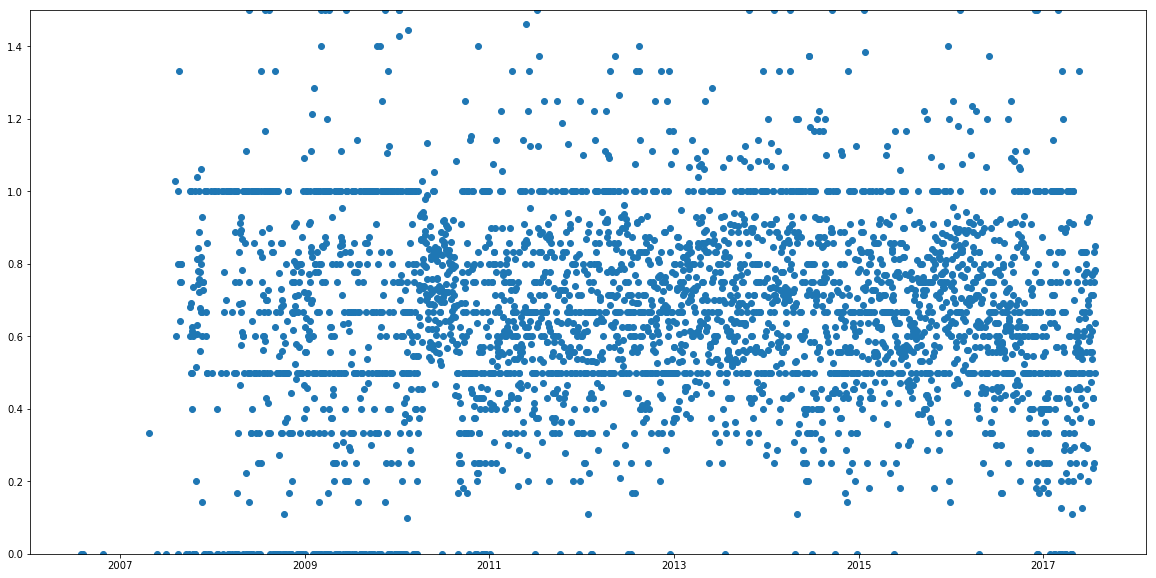

In [18]:
plot_city_stats(EDH_dates, EDH_counts,
               #redo_x=([datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)]),
               redo_y=(0, 1.5)
               )